# Data Challenge

In [48]:
from glob import glob

# APIs algébricas, matemáticas e para tratamento e manipulação de dados
import numpy as np
import pandas as pd

# APIs para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração das APIs de visualização
plt.rcParams.update({'figure.figsize': (13,13)})

# APIs para aprendizado de máquina
#import tensorflow as tf
!pip install -U ppscore
import ppscore as pps
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [49]:
dataFiles = sorted(glob('Training/Small/Sample**.csv'))

In [50]:
dataFiles.extend(sorted(glob('Training/Large/Sample**.csv')))

In [51]:
#Criando dataFrames para cada arquivo
dataFrames = []

particleSizeData = pd.read_csv('Training/Training Operation Profiles of Samples.csv', ';')
for file in dataFiles:
    df = pd.read_csv(file)
    df["Pressure_Diferential(psi)"] = df["Upstream_Pressure(psi)"] - df["Downstream_Pressure(psi)"] #Calculo da perda de Carga
    df["sample"] = int(file[-6:-4])
    df.join(particleSizeData.set_index('sample'), on='sample')
    df['threshold'] = [0 if value < 20 else 1 for value in df['Pressure_Diferential(psi)']] #Definindo limiar de perda de carga
    dataFrames.append(df)
    

In [52]:
#Encontrando o primeiro valor com perda de carga maior que 20 psi
limits = []
for df in dataFrames:
    for value,time in zip(df['threshold'],df['Time(s)']):
        if (value == 1) :
            limits.append(time)
            break;

In [53]:
#Criando coluna de vida util remanscente
for df,limit in zip(dataFrames, limits):
    df['Remaining Lifespan(s)'] = [(limit - instant) if (instant < limit) else 0 for instant in df['Time(s)']];

In [54]:
#Unindo dataframes em um único
dataFrame = pd.concat(dataFrames).reset_index();

In [55]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62824 entries, 0 to 62823
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      62824 non-null  int64  
 1   Time(s)                    62824 non-null  float64
 2   Flow_Rate(ml/m)            62824 non-null  float64
 3   Upstream_Pressure(psi)     62824 non-null  float64
 4   Downstream_Pressure(psi)   62824 non-null  float64
 5   Pressure_Diferential(psi)  62824 non-null  float64
 6   sample                     62824 non-null  int64  
 7   threshold                  62824 non-null  int64  
 8   Remaining Lifespan(s)      62824 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 4.3 MB


In [56]:
dataFrame.describe()

,index,Time(s),Flow_Rate(ml/m),Upstream_Pressure(psi),Downstream_Pressure(psi),Pressure_Diferential(psi),sample,threshold,Remaining Lifespan(s)
count,62824.000000,62824.000000,62824.000000,62824.000000,62824.000000,62824.000000,62824.000000,62824.000000,62824.000000
mean,1342.340443,134.234044,523.405825,5.683977,0.010881,5.673095,20.116325,0.116198,99.348937
std,814.700696,81.470070,101.318216,8.280750,0.710498,8.262360,16.319267,0.320464,75.978419
min,0.000000,0.000000,-3.687368,-3.900000,-3.481250,-1.387500,1.000000,0.000000,0.000000
25%,654.000000,65.400000,535.583386,0.975000,-0.626563,0.962500,5.000000,0.000000,29.000000
50%,1308.000000,130.800000,557.300312,1.987500,0.118750,1.856250,11.000000,0.000000,94.400000
75%,1963.000000,196.300000,563.223110,4.793750,0.662500,4.681250,37.000000,0.000000,159.900000
max,3539.000000,353.900000,931.325003,35.306250,1.431250,34.956250,44.000000,1.000000,277.500000


In [64]:
pressoes = dataFrame.columns.values.tolist()
pressoes.remove('index')
pressoes.remove('sample')
pressoes.remove('threshold')

In [65]:
len(pressoes)

6

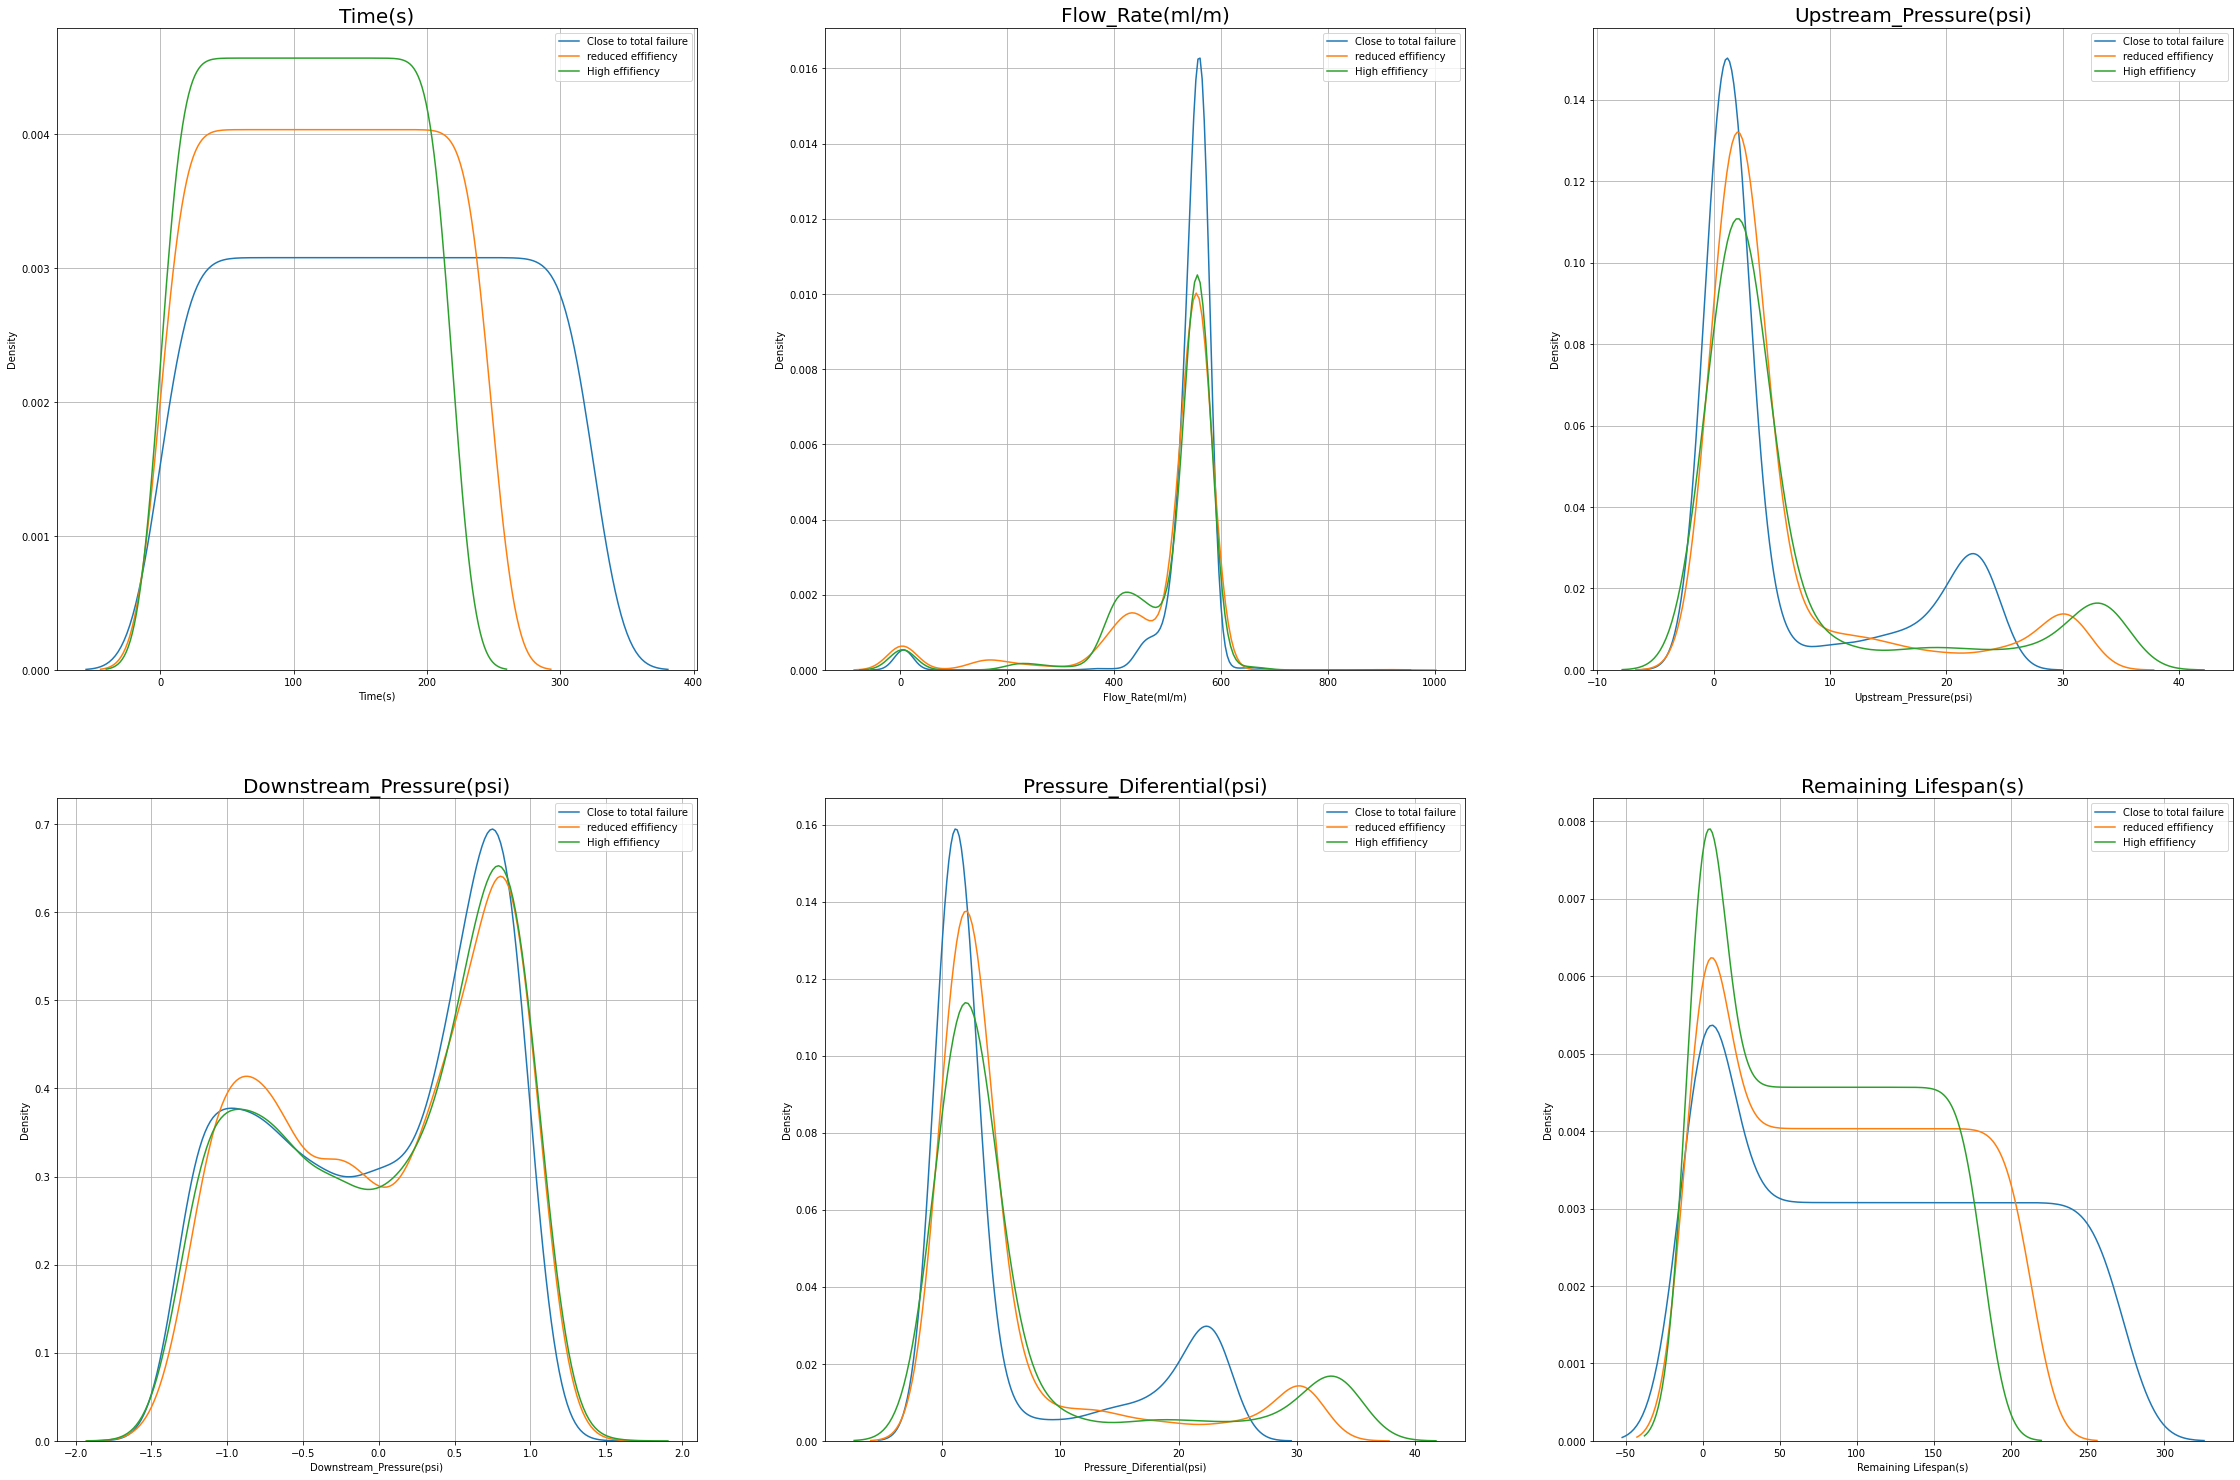

In [73]:
n_cols = 3
n_rows = 5//3 + 1
# sensors.size//3 + 1
fig, ax = plt.subplots(ncols = n_cols, nrows = n_rows, figsize = (13*n_cols, 13*n_rows))
ax = ax.reshape((n_cols*n_rows,))
aux_df = dataFrame.groupby('sample')
tam=len(pressoes)

for pressao in range(len(pressoes)):  
    ax[pressao].set_title(f'{pressoes[pressao]}', size = 20)
    sns.kdeplot(data = aux_df.get_group(1)[pressoes[pressao]], ax = ax[pressao], label = 'Close to total failure')
    sns.kdeplot(data = aux_df.get_group(33)[pressoes[pressao]], ax = ax[pressao], label = 'reduced effifiency')
    sns.kdeplot(data = aux_df.get_group(44)[pressoes[pressao]], ax = ax[pressao], label = 'High effifiency')
    ax[pressao].legend()
    ax[pressao].grid()

In [ ]:
# A partir daqui vem o proposto pelo Pires

data = pd.concat((pd.read_csv(file).assign(sample = int(file[-6:-4]) for file in dataFiles), ignore_index = True)

In [ ]:
particleSizeData = pd.read_csv('Training/Training Operation Profiles of Samples.csv', ';')

In [ ]:
data.join(particleSizeData.set_index('sample'), on='sample')

In [ ]:
data["Pressure_Diferential(psi)"] = data["Upstream_Pressure(psi)"] - data["Downstream_Pressure(psi)"]